<p style = "font-size: 22px; font-weight:700; text-align: center;"> Практическая работа 1</p>

<em>Выполнила: студентка группы ММР211, Исаева Юлия Олеговна</em>

<b>Цель работы:</b> предсказать, был ли пассажир перенесен в альтернативное измерение во время столкновения космического корабля "Титаник" с пространственно-временной аномалией

<b>Описание данных.</b>

Источник: https://www.kaggle.com/competitions/spaceship-titanic/overview

<em>PassengerId</em> - Уникальный идентификатор для каждого пассажира. Каждый идентификатор имеет форму gggg_pp, где gggg указывает группу, с которой путешествует пассажир, а pp - их номер в группе. Люди в группе часто являются членами семьи, но не всегда.<br>
<em>HomePlanet</em> - планета, с которой вылетел пассажир, как правило, их планета постоянного проживания.<br>
<em>CryoSleep</em> - указывает, решил ли пассажир погрузиться в анабиоз на время путешествия. Пассажиры, находящиеся в криосне, прикованы к своим каютам.<br>
<em>Cabin</em> - номер каюты, в которой находится пассажир. Принимает форму deck/num/side, где side может быть либо P для левого, либо S для правого борта.<br>
<em>Destination</em> - планета, на которой пассажир будет высаживаться.<br>
<em>Age</em> - возраст пассажира.<br>
<em>VIP</em> - платил ли пассажир специальное VIP-обслуживание во время рейса.<br>
<em>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</em>  - сумма, которую пассажир оплатил за все многочисленные роскошные удобства космического корабля "Титаник".<br>
<em>Name</em> - имя и фамилия пассажира.<br>
<em>Transported</em> - целевая переменная: был ли пассажир перенесен в другое измерение.

<b>Импортирование библиотек.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<b>Базовый анализ данных.</b>

In [2]:
df = pd.read_csv("Data/train.csv", sep = ',')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [5]:
df.shape

(8693, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


С помощью приведенной выше аналитики видим, что размерность нашего датасета: 14 столбцов и 8693 строки.<br>
7 переменных являются строковым типом данных, 6 переменных - числовой тип (число с плавающей запятой) и 1 переменная булевого типа.

In [7]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Исходя из данных выше мы можем подчеркнуть основную информацию:
    <ul>
    <li>Столбец PassengerId действительно является уникальным идентификатором пассажира, так как все значения уникальны;</li>
    <li>Столбцы HomePlanet, CryoSleep, Destination и VIP принимают небольшое кол-во значений, что указывает нам на то, что они могут быть категориальными и нам необходимо их будет перекодировать для более оптимальной дальнейшей работы с ними;</li>
    <li>Столбцы Cabin и Name являются данными строкового типа, но принимают большое количество значений, поэтому мы не будем преобразовывать их в категориальную переменную.</li>
   </ul>

Также мы видим что, в целом, в данных не очень много пропусков, однако, дополнительно убедимся в этом, рассчитав % missing values.

In [8]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

Действительно, процент пропущенных значений в каждом столбце не превышает 2.5%, что является допустимым значением. При этом в столбце PassengerId, отвечающим за ID, и целевой переменной Transported вообще нет пропущенных значений.

Однако, в данной работе все равно предлагается поработать с пропущенными значениями там, где это целесообразно. Прежде чем понять, каким способом мы будем заполнять пропущенные значения, необходимо проанализировать характер данных.

<b>Numerical features</b>

Для начала изучим распределение числовых переменных массива.

In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


На основе данных о min и max значениях мы видим, что у переменных, отвечающих за расходы пассажиров, очень широкий разброс значений. Убедимся на 1 графике для переменной RoomService.

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

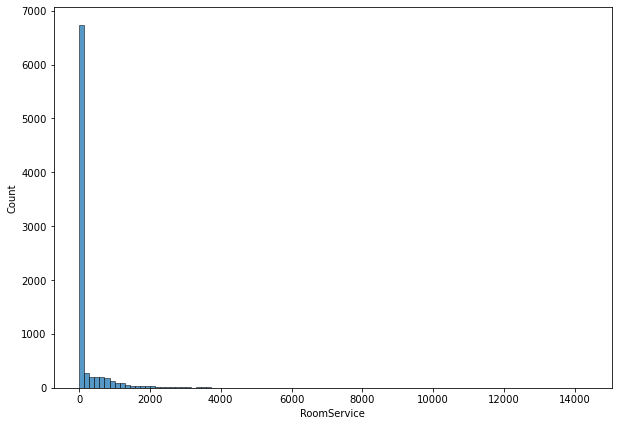

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x=df['RoomService'], bins = 100, ax=ax)

Для того, чтобы дальше было проще работать с данными о расходах, логарифмируем их, а также построим визуализации.

In [11]:
numeric_features = list(df.select_dtypes(include=['float64']))
spendings = list(df.select_dtypes(include=['float64']).drop(columns = 'Age'))

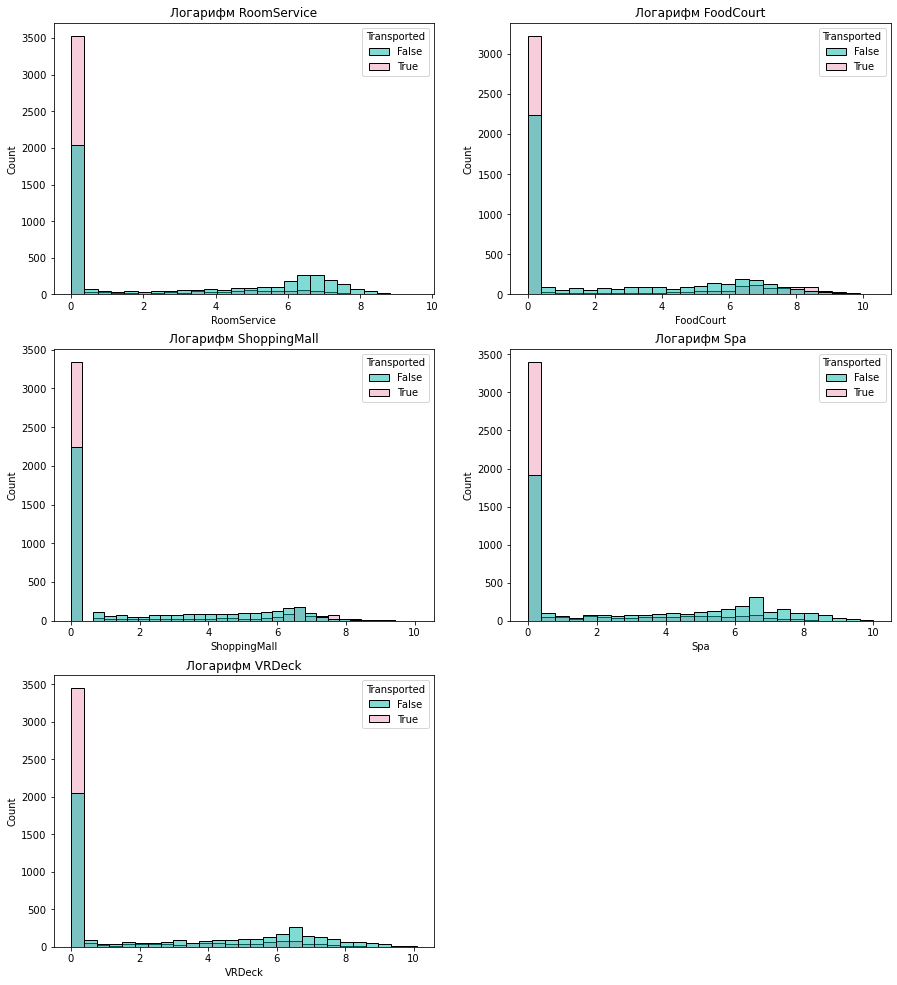

In [12]:
colors = ['#00B8A9', '#F19CBB']
figure = plt.figure(figsize=(15, 17))
for i in spendings:
    ax = plt.subplot(3, 2, 1 + spendings.index(i))
    ax = sns.histplot(x=np.log1p(df[i]), hue=df['Transported'], palette = colors)  #логарифмируем расходы
    ax.set_title('Логарифм {}'.format(i))

На графиках хорошо видно, что большая часть пассажиров совершенно не тратила деньги на доп. услуги, т.е. их расходы равнялись 0.<br>Попробуем посмотреть на распределение расходов только тех пассажиров, чьи расходы были не нулевые.

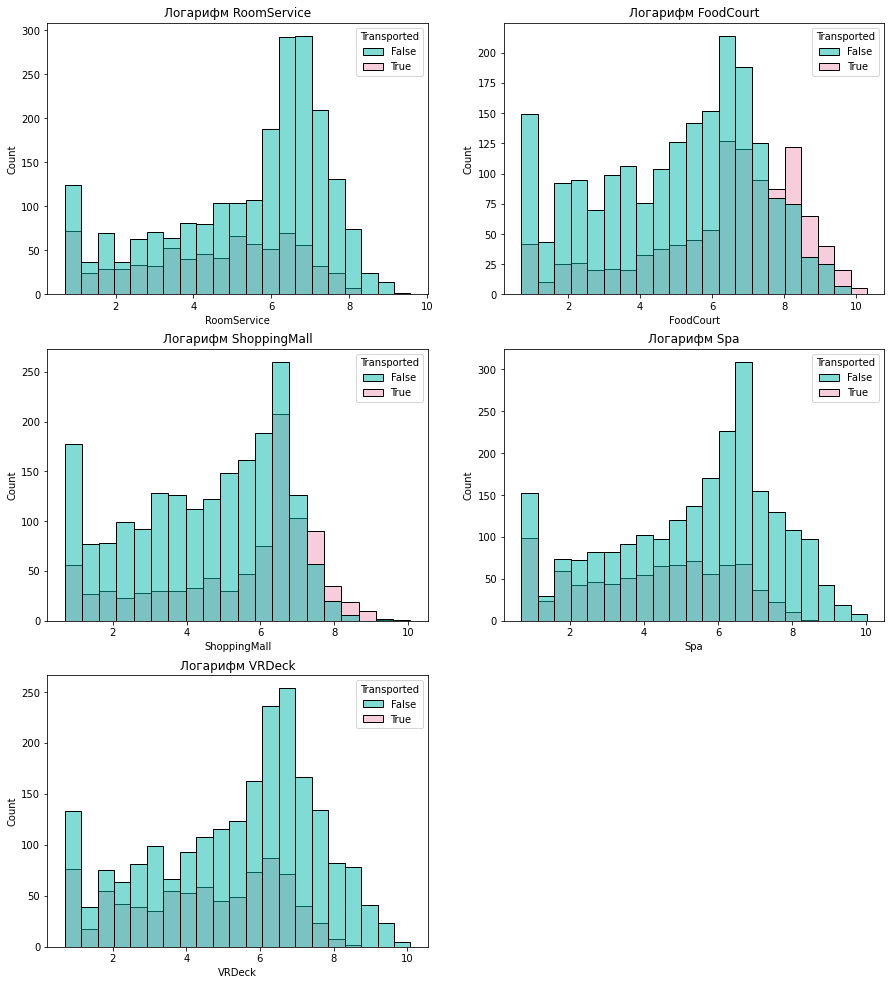

In [13]:
colors = ['#00B8A9', '#F19CBB']
figure = plt.figure(figsize=(15, 17))
for i in spendings:
    ax = plt.subplot(3, 2, 1 + spendings.index(i))
    ax = sns.histplot(x=np.log1p(df[df[i]>0][i]), hue=df['Transported'], palette = colors)  #логарифмируем расходы
    ax.set_title('Логарифм {}'.format(i))

Здесь мы уже видим, что распределение расходов пассажиров (с ненулевыми расходами) близко к нормальному. Более того, распределение всех типов расходов очень похожи между собой (имеют пик между в интервале логарифма расходов (6,8)).

Попробуем построить новую переменную итоговых расходов:

In [14]:
df['TotalSpendings'] = df.loc[:,spendings].sum(axis=1)

In [15]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpendings
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


<AxesSubplot:xlabel='TotalSpendings', ylabel='Count'>

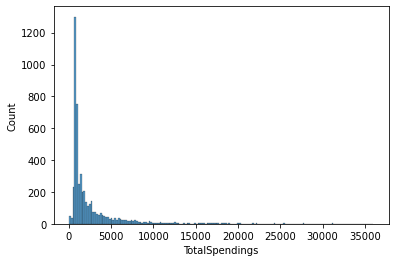

In [16]:
sns.histplot(x=df[df['TotalSpendings']>0]['TotalSpendings'], palette = colors)

Наконец, поработаем с выбросами в новой переменной.

<b>Поиск выбросов</b>

Выбросы продолжим искать во вспомогательном массиве пассажиров с ненулевыми расходами.

In [17]:
df_not_null = df.loc[df['TotalSpendings']>0].copy() #создаем копию, чтобы избежать предупреждения SettingWithCopyWarning

In [18]:
df_not_null.shape

(5040, 15)

In [19]:
def find_anomaly(df = df_not_null, column = 'TotalSpendings'): 
    upper_level = df[column].mean() + 3 * df[column].std()
    lower_level = df[column].mean() - 3 * df[column].std()
    anomaly = df[(df[column] > upper_level) & (df[column] < lower_level)]
    return upper_level, lower_level, anomaly

In [20]:
anomaly = find_anomaly(df = df_not_null, column = 'TotalSpendings')
anomaly

(12415.655074650153,
 -7445.23801115809,
 Empty DataFrame
 Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, TotalSpendings]
 Index: [])

In [21]:
upper_level = df_not_null['TotalSpendings'].mean() + 3 * df_not_null['TotalSpendings'].std()
lower_level = df_not_null['TotalSpendings'].mean() - 3 * df_not_null['TotalSpendings'].std()

In [22]:
upper_level

12415.655074650153

In [23]:
lower_level

-7445.23801115809

Text(0.5, 1.0, '3 sigma')

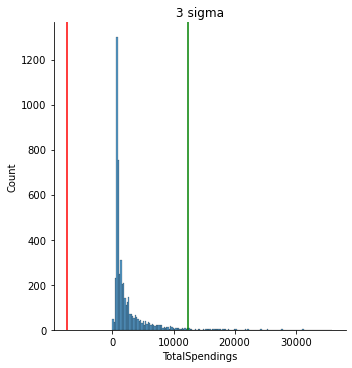

In [24]:
sns. displot (df_not_null['TotalSpendings'])
plt.axvline(x = anomaly [0], color = 'g', linestyle = '-') #вертикальная линия параллельная оси X
plt.axvline(x = anomaly [1], color = 'r', linestyle = '-')
plt.title('3 sigma')

Получили отрицательную левую границу, однако характер наших данных не подразумевает отрицательных значений, поэтому смотрим только на правую границу.

In [25]:
df_not_null['Anomaly_big'] = np.where(df_not_null['TotalSpendings'] > anomaly[0], 1, 0)
df_not_null[df_not_null['Anomaly_big'] == 1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpendings,Anomaly_big
73,0078_01,Europa,False,C/4/S,TRAPPIST-1e,38.0,False,0.0,5840.0,0.0,321.0,9654.0,Spuri Pokerheed,False,15815.0,1
105,0110_03,Europa,False,B/5/P,TRAPPIST-1e,42.0,False,2209.0,11418.0,0.0,1868.0,445.0,Alaratz Aloubtled,True,15940.0,1
154,0177_01,Europa,False,B/2/S,TRAPPIST-1e,38.0,False,0.0,10346.0,1.0,14970.0,2111.0,Toperon Iniouser,False,27428.0,1
358,0395_01,Europa,False,B/17/P,55 Cancri e,31.0,True,0.0,11003.0,552.0,8157.0,5688.0,Meropus Hervel,False,25400.0,1
375,0412_01,Europa,False,C/11/P,TRAPPIST-1e,60.0,False,0.0,7255.0,5952.0,1537.0,0.0,Baton Quelfly,True,14744.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8442,9015_01,Europa,False,B/344/S,55 Cancri e,41.0,False,3.0,1320.0,0.0,0.0,12392.0,Nunkino Perable,False,13715.0,1
8459,9034_03,Europa,False,D/288/P,55 Cancri e,27.0,False,0.0,984.0,0.0,13995.0,312.0,Phecca Headmish,False,15291.0,1
8487,9069_05,Europa,False,B/297/P,55 Cancri e,29.0,False,0.0,12563.0,0.0,3.0,5057.0,Mirfark Taketiatim,False,17623.0,1
8588,9168_01,Europa,False,C/338/S,55 Cancri e,36.0,False,23.0,14773.0,0.0,1159.0,7819.0,Hadirk Cassiding,False,23774.0,1


Получили 114 выбросов, что не так уж и много, поэтому можем удалить данные строки. Важно отметить, что мы работали с копией массива (пассажиры с ненулевыми расходами), а строки необходимо удалить из исходного датафрейма. Для этого будем использовать мердж.

In [26]:
df_to_delete = df_not_null[df_not_null['Anomaly_big'] == 1]

In [27]:
df_to_delete.shape

(114, 16)

In [28]:
df2 = df.merge(df_to_delete.PassengerId, 
                   how='left', indicator=True)
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpendings,_merge
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,left_only
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,left_only
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,left_only
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,left_only
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,left_only
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,left_only
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,left_only
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,left_only


In [29]:
df2 = df2.loc[df2._merge=='left_only',df2.columns!='_merge']
df2.shape

(8579, 15)

Получили новый массив df2 с очищенными выбросами по переменным с расходами пассажиров на доп. услуги.<br>
Теперь посмотрим на признак Age.

Text(0.5, 1.0, 'Age')

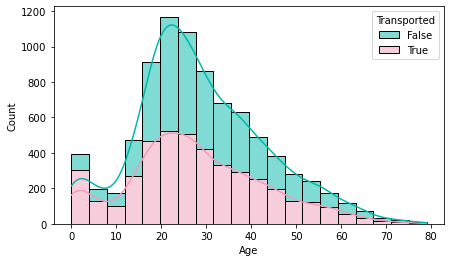

In [30]:
figure = plt.figure(figsize=(7, 4))

sns.histplot(x='Age', hue='Transported', data=df2, bins=20, multiple="stack", kde=True, palette = colors) #данные о возрасте не логарифмируем
ax.set_title('Age')

Распределение возраста похоже на нормальное, хотя смещено влево и имеет еще один пик с левого края (возможно, на борту было много пассажиров с детьми-младенцами). Также видим определенную зависимость целевой переменной Transported от возраста - действительно, в диапазоне 0-10 лет высокий % перенесенных пассажиров. Получается, что дети легче переносились, чем взрослые. <br>Также посмотрим на график, который поможет нам определить выбросы.

<AxesSubplot:xlabel='Transported', ylabel='Age'>

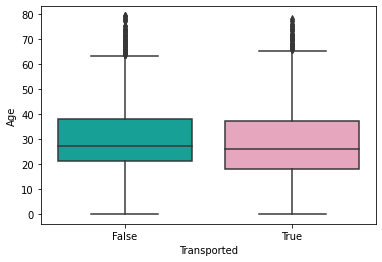

In [31]:
sns.boxplot(x='Transported', y='Age', data=df2, palette=colors)

Действительно видим, что имеются выбросы по верхней границе. Аналогичным образом воспользуемся методом 3 сигм для их выявления.

In [32]:
upper_level_Age = df2['Age'].mean() + 3 * df2['Age'].std()

In [33]:
df_to_delete = df2[df2.Age>upper_level_Age]
df_to_delete.shape

(25, 15)

In [34]:
df3 = df2.merge(df_to_delete.PassengerId, 
                   how='left', indicator=True)
df3 = df3.loc[df3._merge=='left_only',df3.columns!='_merge'].reset_index().drop(columns = 'index')
df3.shape

(8554, 15)

Таким образом, мы изучили характер распределения числовых переменных и поработали с выбросами в данных. Далее приступим к работе с пропущенными значениями.

<b>Замена пропущенных значений</b>

In [35]:
df3.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpendings
count,8378.000000,8376.000000,8373.000000,8348.000000,8374.000000,8366.000000,8554.000000
mean,28.585581,219.516476,352.535770,167.422257,252.657153,249.487688,1214.760112
std,14.296754,626.979537,1092.063289,507.726497,822.219595,852.248868,1955.415610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,706.000000
75%,37.000000,47.000000,53.000000,27.000000,49.000000,36.750000,1368.000000
max,72.000000,9920.000000,12077.000000,9058.000000,10976.000000,12143.000000,12386.000000


In [36]:
for i in spendings:
    print('Медиана столбца {} равна {}'.format(i,df3[i].median()))

Медиана столбца RoomService равна 0.0
Медиана столбца FoodCourt равна 0.0
Медиана столбца ShoppingMall равна 0.0
Медиана столбца Spa равна 0.0
Медиана столбца VRDeck равна 0.0


Шаг 1. Заменим пропуски в числовых переменных. После того, как мы очистили данные от выбросов, которые могут смещать статистики, для возраста теперь мы можем использовать среднее.<br>
Для расходов предлагается использовать медианное значение, равное 0, поскольку значительная доля пассажиров, как мы выяснили ранее, не тратила на доп. услуги.

In [37]:
for i in numeric_features:
    count_null = df3[i].isnull().sum()
    if i == "Age":
        imp_value = df3[i].mean()
    else:
        imp_value = df3[i].median()
    df3[i] = df3[i].fillna(imp_value)
    print('В переменной \033[1m{}\033[0m {} пропущенных значений были заменены на значение {}'.format(i,count_null,round(imp_value,1)))

В переменной Age 176 пропущенных значений были заменены на значение 28.6
В переменной RoomService 178 пропущенных значений были заменены на значение 0.0
В переменной FoodCourt 181 пропущенных значений были заменены на значение 0.0
В переменной ShoppingMall 206 пропущенных значений были заменены на значение 0.0
В переменной Spa 180 пропущенных значений были заменены на значение 0.0
В переменной VRDeck 188 пропущенных значений были заменены на значение 0.0


Проверим, что среди числовых переменных не осталось пропусков:

In [38]:
df3.isnull().sum()/len(df3)*100

PassengerId       0.000000
HomePlanet        2.314707
CryoSleep         2.501754
Cabin             2.267945
Destination       2.104279
Age               0.000000
VIP               2.338087
RoomService       0.000000
FoodCourt         0.000000
ShoppingMall      0.000000
Spa               0.000000
VRDeck            0.000000
Name              2.279635
Transported       0.000000
TotalSpendings    0.000000
dtype: float64

Шаг 2. Одним из методов работы с пропущенными данными строкового типа является мода. При этом необходимо подчеркнуть, что заменять данные в столбцах Cabin и Name не логично на данном этапе как с точки зрения смысла (например, заполнять пропуски данных по имени не имеет практической пользы), так и технически (так как принимают большое кол-во уникальных значений).

In [39]:
categorical_features = df3.select_dtypes(include=['object']).drop(columns=['Name','Cabin','PassengerId'])

In [40]:
categorical_features.head()

,HomePlanet,CryoSleep,Destination,VIP
0,Europa,False,TRAPPIST-1e,False
1,Earth,False,TRAPPIST-1e,False
2,Europa,False,TRAPPIST-1e,True
3,Europa,False,TRAPPIST-1e,False
4,Earth,False,TRAPPIST-1e,False


In [41]:
for i in categorical_features:
    count_null = df3[i].isnull().sum()
    input_value = df3[i].mode()[0]
    df3[i] = df3[i].fillna(input_value)
    print('В переменной \033[1m{}\033[0m {} пропущенных значений были заменены на значение {}'.format(i,count_null,input_value))

В переменной HomePlanet 198 пропущенных значений были заменены на значение Earth
В переменной CryoSleep 214 пропущенных значений были заменены на значение False
В переменной Destination 180 пропущенных значений были заменены на значение TRAPPIST-1e
В переменной VIP 200 пропущенных значений были заменены на значение False


In [42]:
df3.Cabin = df3.Cabin.fillna(0)

In [43]:
df3.Name = df3.Name.fillna(0)

In [44]:
df3.isnull().sum()/len(df3)*100

PassengerId       0.0
HomePlanet        0.0
CryoSleep         0.0
Cabin             0.0
Destination       0.0
Age               0.0
VIP               0.0
RoomService       0.0
FoodCourt         0.0
ShoppingMall      0.0
Spa               0.0
VRDeck            0.0
Name              0.0
Transported       0.0
TotalSpendings    0.0
dtype: float64

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8554 non-null   object 
 1   HomePlanet      8554 non-null   object 
 2   CryoSleep       8554 non-null   bool   
 3   Cabin           8554 non-null   object 
 4   Destination     8554 non-null   object 
 5   Age             8554 non-null   float64
 6   VIP             8554 non-null   bool   
 7   RoomService     8554 non-null   float64
 8   FoodCourt       8554 non-null   float64
 9   ShoppingMall    8554 non-null   float64
 10  Spa             8554 non-null   float64
 11  VRDeck          8554 non-null   float64
 12  Name            8554 non-null   object 
 13  Transported     8554 non-null   bool   
 14  TotalSpendings  8554 non-null   float64
dtypes: bool(3), float64(7), object(5)
memory usage: 827.1+ KB


Обратим внимание, что после заполнения пропущенных значений, переменные CryoSleep и VIP стали булевого типа, так как больше нет значений NaN из-за которых тип данных был object.

Теперь, когда мы ознакомились с массивом и поработали с пропущенными значениями, перейдем к детальному изучению датасета.

<b>Детальное изучение переменных и взаимосвязей.</b>

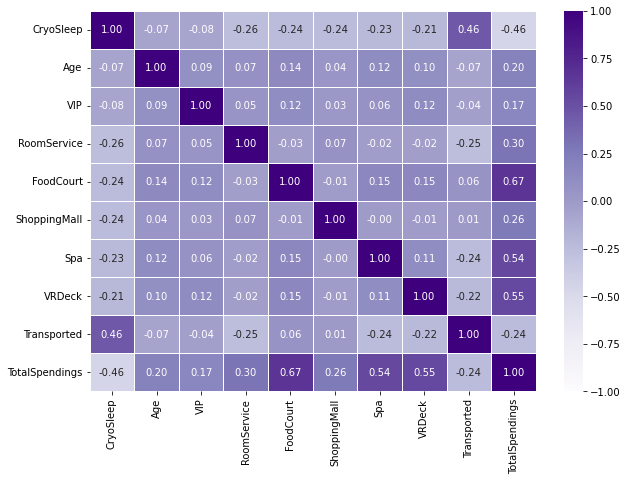

In [46]:
corr_m = df3.corr()

fig = plt.figure(figsize=(10, 7))
corr_m = sns.heatmap(corr_m, annot=True,
                 linecolor = 'white',
                 linewidth = 1,
                 cmap = 'Purples',
                 vmin=-1., 
                 vmax=1.,
                 fmt=".2f",
                 )

Корреляционная матрица не позволяет нам сделать большое количество выводов, поскольку все значения лежат практически в одном диапазоне. Однако, можно заметить, что целевая переменная Transported сильно коррелирует с переменной CryoSleep. И, конечно же, переменные по расходам коррелируют с общими расходами (TotalSpendings), что очевидно. 

Начнем с изучения целевой переменной <b>Transported</b>.

In [47]:
df3.Transported.value_counts()

True     4336
False    4218
Name: Transported, dtype: int64

Видим, что пропорция траспортированных и нетранпортированных пассажиров, примерно 50/50. Убедимся в этом, построив визуализацию.

<AxesSubplot:title={'center':'Доля траспортированных и нетранпортированных пассажиров'}, ylabel='Transported'>

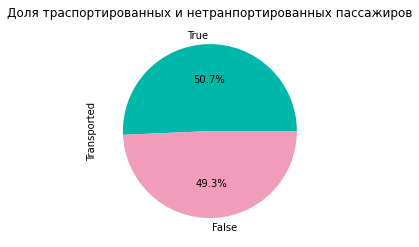

In [48]:
df3['Transported'].value_counts().plot(kind='pie', figsize = (7,4),
                                                   colors = colors, title = 'Доля траспортированных и нетранпортированных пассажиров', 
                                                   autopct = '%.1f%%')

<b>HomePlanet</b>

In [49]:
df3.HomePlanet.value_counts()

Earth     4788
Europa    2012
Mars      1754
Name: HomePlanet, dtype: int64

In [50]:
df3['HomePlanet'] = pd.Categorical(df3.HomePlanet)

Больше всего пассажиров вылетело с Земли, меньше всего - с Марса. Посмотрим, а сколько пассажиров было перенесено в другое измерение с каждой планеты.

In [51]:
df3.groupby('HomePlanet').agg({'Transported':'sum'})

,Transported
HomePlanet,
Earth,2051
Europa,1368
Mars,917


Видим, что распределение пропорционально общему кол-ву пассажиров: наибольшее - было перевезено с Земли, наименьшее так же с Марса. Однако, это абсолютные величины, а какая доля траспортированных пассажиров?

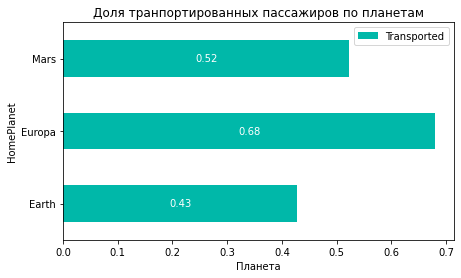

In [52]:
HomePlanet_Transp = df3.groupby('HomePlanet').agg({'Transported':'mean'}).plot(kind = 'barh', color = colors[0], figsize=(7, 4))
HomePlanet_Transp.set_xlabel('Планета')
HomePlanet_Transp.set_title('Доля транпортированных пассажиров по планетам')

for i in HomePlanet_Transp.containers:
    HomePlanet_Transp.bar_label(i, label_type='center', color = 'white', fmt='%.2f')

Получили первый инсайт! Несмотря на то, что с Земли в абсолютном значении было перевезено больше всего пассажиров, в относительном отношении Земля показала наименьшую долю - 43%. В то время как с Европы - 66% и Марса - 52%.

<b>CryoSleep</b>

In [53]:
df3.CryoSleep.value_counts()

False    5523
True     3031
Name: CryoSleep, dtype: int64

Большая часть пассажиров не находилась в криосне.

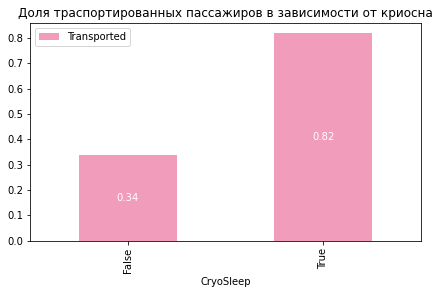

In [54]:
CryoSleep_Transp = df3.groupby('CryoSleep').agg({'Transported':'mean'}).plot(kind = 'bar', color = colors[1], figsize=(7, 4))
CryoSleep_Transp.set_xlabel('CryoSleep')
CryoSleep_Transp.set_title('Доля траспортированных пассажиров в зависимости от криосна')

for i in CryoSleep_Transp.containers:
    CryoSleep_Transp.bar_label(i, label_type='center', color = 'white', fmt='%.2f')

Получили второй интересный инсайт: нахождение пассажира в криосне положительно коррелирует с фактом транспортировки. Так, 82% пассажиров, находящихся в криосне, были перенесены, а из тех, кто не находился в криосне, было транспортировано только 34%.

<b>Destination</b>

In [55]:
df3.Destination.value_counts()

TRAPPIST-1e      6023
55 Cancri e      1737
PSO J318.5-22     794
Name: Destination, dtype: int64

In [56]:
df3['Destination'] = pd.Categorical(df3.Destination)

In [57]:
df3[['Destination','Transported']].value_counts().to_frame()

0
Destination   Transported      
TRAPPIST-1e   False        3165
              True         2858
55 Cancri e   True         1077
              False         660
PSO J318.5-22 True          401
              False         393

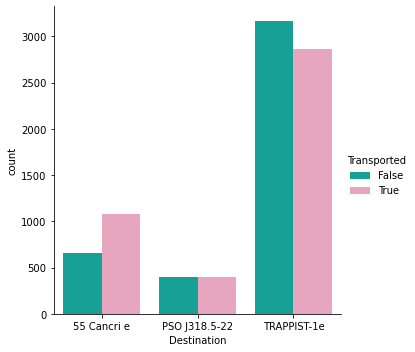

In [58]:
sns.catplot(x="Destination", hue='Transported', kind="count", data=df3, palette=colors)
plt.show()

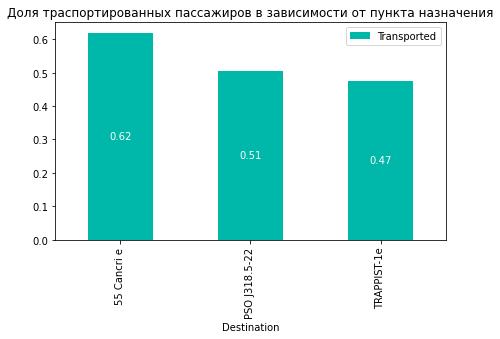

In [59]:
Destination_Transp = df3.groupby('Destination').agg({'Transported':'mean'}).plot(kind = 'bar', color = colors[0], figsize=(7, 4))
Destination_Transp.set_xlabel('Destination')
Destination_Transp.set_title('Доля траспортированных пассажиров в зависимости от пункта назначения')

for i in Destination_Transp.containers:
    Destination_Transp.bar_label(i, label_type='center', color = 'white', fmt='%.2f')

Проанализировав 2 графика выше можно сделать вывод о том, что несмотря на то, что в направлении TRAPPIST-1e было перевезено больше всего пассажиров, доля транпортированых здесь самая низкая (47%). Самая высокая доля наблюдается на направлении 55 Cancri e. 

<b>VIP</b>

In [60]:
df3.VIP.value_counts(normalize=True)

False    0.978373
True     0.021627
Name: VIP, dtype: float64

VIP-пассажиров было всего 2% на борту.

<AxesSubplot:ylabel='VIP'>

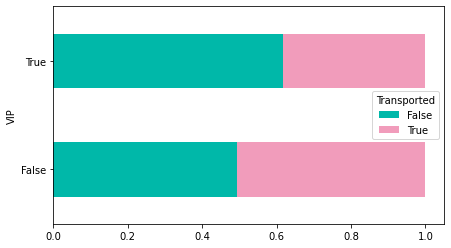

In [61]:
df.groupby('VIP')['Transported'].value_counts(normalize=True).unstack('Transported').plot.barh(stacked=True,figsize=(7,4), color = colors)

При этом доля траспортированных VIP-клиентов не намного ниже, чем обычных. Учитывая небольшое число VIP-пассажиров и отсутствие значительной разницы в транспортировке VIP и не VIP, вероятно, данная переменная не будет оказывать значительного влияния на прогноз.

Дополнительно посчитаем суммарные расходы VIP и не VIP клиентов на доп. услуги.

In [62]:
df.groupby('VIP')['TotalSpendings'].sum().to_frame()

,TotalSpendings
VIP,
False,11371145.0
True,880670.0


VIP-клиенты также немного тратили не доп. расходы, вероятно потому, что они уже были включены в их тариф.

<b>Cabin</b>

Исходя из описания данных знаем, что <em>Cabin</em> - номер каюты, в которой находится пассажир. Принимает форму deck/num/side. <br> И как мы проанализировали ранее, она содержит 6560 уникальных строковых значений, что не несет для нас ценности в таком виде. Поэтому преобразуем ее в 3 признака по разделителю "/" и исследуем их.

In [63]:
df3[['cabin_deck', 'cabin_num', 'cabin_side']] = df3['Cabin'].str.split('/', expand=True)
df3['cabin_num'] = pd.to_numeric(df3['cabin_num'])
df3 = df3.drop(columns='Cabin')

In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     8554 non-null   object  
 1   HomePlanet      8554 non-null   category
 2   CryoSleep       8554 non-null   bool    
 3   Destination     8554 non-null   category
 4   Age             8554 non-null   float64 
 5   VIP             8554 non-null   bool    
 6   RoomService     8554 non-null   float64 
 7   FoodCourt       8554 non-null   float64 
 8   ShoppingMall    8554 non-null   float64 
 9   Spa             8554 non-null   float64 
 10  VRDeck          8554 non-null   float64 
 11  Name            8554 non-null   object  
 12  Transported     8554 non-null   bool    
 13  TotalSpendings  8554 non-null   float64 
 14  cabin_deck      8360 non-null   object  
 15  cabin_num       8360 non-null   float64 
 16  cabin_side      8360 non-null   object  
dtypes: bool(3), ca

In [65]:
df3.cabin_deck.value_counts()

F    2788
G    2550
E     869
B     736
C     695
D     471
A     246
T       5
Name: cabin_deck, dtype: int64

Эта информация яввляется уже более интересной для нас, всего 8 категорий.

<AxesSubplot:xlabel='cabin_deck'>

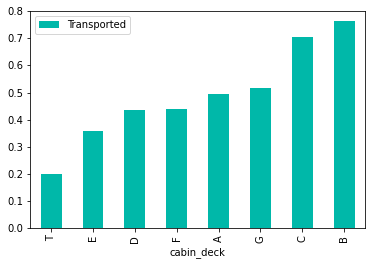

In [66]:
df3.groupby('cabin_deck').agg({'Transported':'mean'}).sort_values(by='Transported').plot(kind = 'bar', color = colors[0])

Мы видим определенную закономерность между палубой и транспортировкой. Вероятнее всего, какие-то палубы были более безопасны. Поэтому мы будем использовать данную переменную для прогноза. Но чтобы наша модель корректно распознала признак, его нужно перекодировать в числовую переменную. Также сгруппируем палубы в 3 группы.

In [67]:
DeckGroup = {'T': 1, 'E': 2,'A': 2, 'D': 2,'F': 2,'G': 2,'C': 3,'B': 3}

In [68]:
df3['DeckGroup'] = df3['cabin_deck'].replace(DeckGroup)

In [69]:
imp = df3['DeckGroup'].mode()[0]
imp

2.0

In [70]:
df3['DeckGroup'] = df3.DeckGroup.fillna(imp) #самая многочисленная группа(мода)

<AxesSubplot:title={'center':'Распределение пассажиров по номеру кабины'}, xlabel='cabin_num', ylabel='Count'>

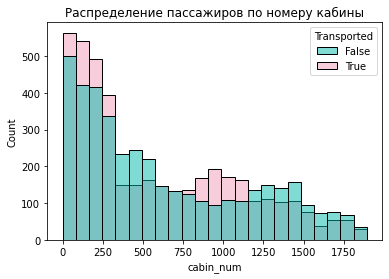

In [71]:
plt.title('Распределение пассажиров по номеру кабины')
sns.histplot(x="cabin_num", data=df3, hue = 'Transported', palette = colors)

Так как у нас большое кол-во уникальных значений, сгруппируем их:

In [72]:
def group(x):
    
    if (x >= 0) & (x <= 300):
        return 1
    elif (x > 300) & (x <= 600):
        return 2
    elif (x > 600) & (x <= 900):
        return 3
    elif (x > 900) & (x <= 1200):
        return 3
    elif (x > 1200) & (x <= 1500):
        return 4
    elif (x > 1500): 
        return 5

In [73]:
df3['NumGroup'] = df3['cabin_num'].apply(group)

In [74]:
imp = df3['NumGroup'].mode()[0]

In [75]:
df3['NumGroup'] = df3['NumGroup'].fillna(imp)

Text(0.5, 1.0, 'Распределение пассажиров по номеру группы кабины')

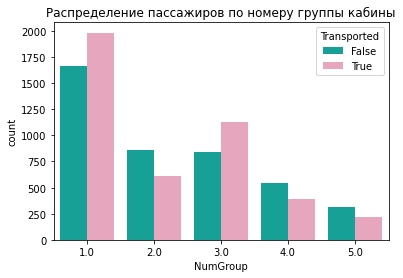

In [76]:
sns.countplot(x=df3.NumGroup, data = df3, hue = 'Transported', palette = colors)
plt.title('Распределение пассажиров по номеру группы кабины')

Теперь зависимость более явная. В первой группе наибольшее число перевезенных пассажиров, в 5 - наименьшее. Так же будем использовать данную переменную для прогноза.

<AxesSubplot:xlabel='cabin_side'>

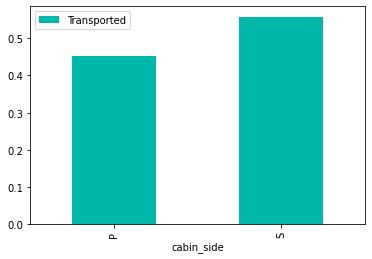

In [77]:
df3.groupby('cabin_side').agg({'Transported':'mean'}).plot(kind = 'bar', color = colors)

Зависимость несущественная от признака side, поэтому переменную можно удалить из массива, а также столбцы, которые мы перекодировали.

In [78]:
df3 = df3.drop(columns=['cabin_side','cabin_num','cabin_deck'])

<b>Machine learning</b>

Теперь, когда мы детально изучили массив, подготовим его к использованию в ML-модели.
В данном случае мы будем решать задачу классификации: будет ли перенесен пассажир в другое измерение или нет (1 или 0).

Существуют разные модели классификации, в данном случае мы будем использовать одну из них - модель К-ближайших соседей.

Для того, чтобы модель корректно работала с категориальными признаками, нам необходимо перекодировать их в числовые.

In [79]:
homeplanet = pd.get_dummies(df3['HomePlanet'])
destination = pd.get_dummies(df3['Destination'])

In [80]:
homeplanet

,Earth,Europa,Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8549,0,1,0
8550,1,0,0
8551,1,0,0
8552,0,1,0


In [81]:
destination

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8549,1,0,0
8550,0,1,0
8551,0,0,1
8552,1,0,0


In [82]:
df3 = pd.concat([df3,homeplanet,destination],axis=1)

In [83]:
df3

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,TotalSpendings,DeckGroup,NumGroup,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,False,0.0,3.0,1.0,0,1,0,0,0,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,True,736.0,2.0,1.0,1,0,0,0,0,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,False,10383.0,2.0,1.0,0,1,0,0,0,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,False,5176.0,2.0,1.0,0,1,0,0,0,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,True,1091.0,2.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8549,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,...,False,8536.0,2.0,1.0,0,1,0,1,0,0
8550,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,...,False,0.0,2.0,4.0,1,0,0,0,1,0
8551,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,...,True,1873.0,2.0,4.0,1,0,0,0,0,1
8552,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,...,False,4637.0,2.0,3.0,0,1,0,1,0,0


Далее подготовим наш массив: x - экзогенные переменные, y - эндогенная переменная (целевая) - Transported.

In [84]:
x = df3.drop(columns=['HomePlanet','Destination','Transported', 'Name','PassengerId']) #удаляем HomePlanet','Destination' так как вместо них у меня эти есть преобразованные фичи
y = df3.Transported

Далее делим датасет на обучающую и тестовую выборки:

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, test_size = 0.2)

Обучаем модель:

In [86]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Делаем прогноз и оцениванием метрику accuracy:

In [87]:
y_pred_test = knn_clf.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.7814143775569842

Таким образом, модель показывает достаточно хорошую предсказательную способность с точностью 0.781 <br>
Однако также в процессе анализа мы выяснили, что переменная VIP, вероятно, не влияет на вероятность транспортировки пассажира, а поэтому является "лишней". Проверим:

In [88]:
x_2 = df3.drop(columns=['HomePlanet','Destination','Transported', 'Name','PassengerId','VIP']) #удалила HomePlanet','Destination' так как вместо них у меня эти есть преобразованные фичи
y_2 = df3.Transported

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_2,y_2,random_state = 0, test_size = 0.2)

In [90]:
knn_clf = KNeighborsClassifier(n_neighbors=10)

#without cross-validation
knn_clf.fit(x_train, y_train)
y_pred_test = knn_clf.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.7819988310929281

Действительно, качество модели немного повысилось до 0.782, если мы исключаем переменную VIP.

<b>Выводы</b>

Таким образом, в данной работе мы:
    <ul>
    <li>Обработали пропущенные значения и выбросы в данных;</li>
    <li>Детально изучили экзогенные факторы;</li>
    <li>Осуществили feature-engineering;</li>
    <li>Подготовили массив для использования ML-модели;</li>
    <li>Осуществили прогноз транспортировки пассажиров с помощью модели машинного обучения и оценили его точность.</li>
    </ul>